In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
customer_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Customer.txt",sep='|')
print(customer_data.shape)
material_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Material.txt",sep='|')
print(material_data.shape)
parentchild_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ParentChild.txt",sep='|')
print(parentchild_data.shape)
sales_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/SALES.csv")
print(sales_data.shape)

(26411, 8)
(213, 8)
(312, 2)
(4396218, 4)


In [ ]:
sales_data.dtypes

Child Material Code      int64
Customer Code Unique     int64
Invoice_Date            object
Sales Liter             object
dtype: object

In [ ]:
print(sales_data['Customer Code Unique'].unique().size)
print(sales_data['Child Material Code'].unique().size)
print(sales_data['Invoice_Date'].unique().size)
print(sales_data['Sales Liter'].unique().size)

10536
231
501
2327


In [ ]:
sales_data['Sales Liter'] = sales_data['Sales Liter'].str.replace(',', '.')
sales_data['Sales Liter'] = sales_data['Sales Liter'].astype('float')
sales_data['Invoice_Date'] = pd.to_datetime(sales_data['Invoice_Date'])

In [ ]:
sales_data.describe()

,Child Material Code,Customer Code Unique,Sales Liter
count,4.396218e+06,4.396218e+06,4.396218e+06
mean,1.613947e+05,1.536221e+04,1.653919e+02
std,2.191641e+04,7.293808e+03,1.143416e+03
min,1.504360e+05,1.031000e+03,1.400000e+00
25%,1.610170e+05,8.633000e+03,3.780000e+01
50%,1.610660e+05,1.767400e+04,7.000000e+01
75%,1.610860e+05,2.175700e+04,1.260000e+02
max,1.004447e+06,2.911200e+04,5.922000e+05


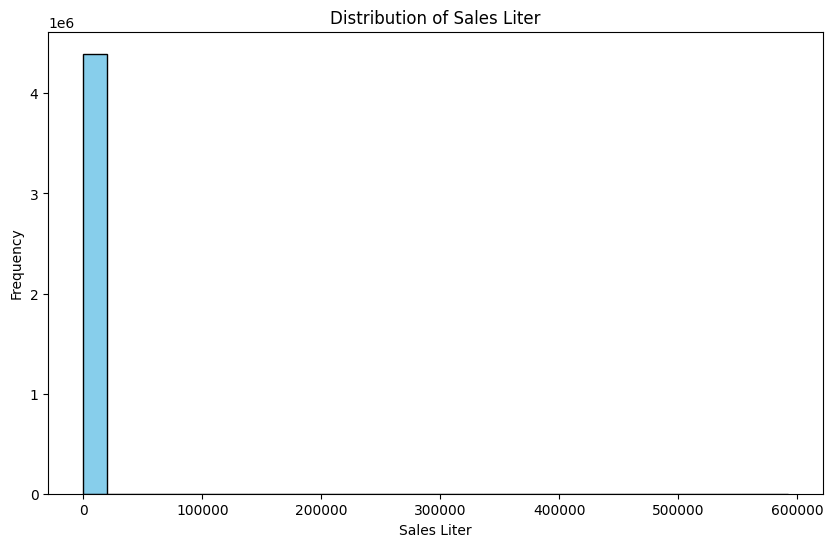

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.hist(sales_data['Sales Liter'], bins=30, color='skyblue', edgecolor='black')  # Adjust 'bins' as needed

# Adding labels and title
plt.xlabel('Sales Liter')
plt.ylabel('Frequency')
plt.title('Distribution of Sales Liter')

# Show the plot
plt.show()

In [ ]:
print(sales_data.head(10))

   Child Material Code  Customer Code Unique Invoice_Date  Sales Liter
0              1000049                 11996   2022-04-12         28.0
1              1000049                  1559   2022-04-12        290.5
2              1000049                 20772   2022-04-12        147.0
3              1000049                  4068   2022-04-12          3.5
4              1000049                  5650   2022-04-12          3.5
5              1000049                  8085   2022-04-12        822.5
6              1002927                 10528   2022-04-12       1344.0
7              1002927                 12135   2022-04-16        147.0
8              1002927                  5458   2022-04-12          7.0
9              1002927                  8085   2022-04-12         49.0


In [ ]:
parentchild_data.dtypes

CHILD     int64
PARENT    int64
dtype: object

In [ ]:
print(parentchild_data['CHILD'].unique().size)
print(parentchild_data['PARENT'].unique().size)

312
213


In [ ]:
parentchild_data['CHILD'].value_counts().unique()

array([1])

In [ ]:
parentchild_data['CHILD'].value_counts()

161000    1
161029    1
161042    1
161041    1
161040    1
         ..
161132    1
161131    1
161130    1
161129    1
151861    1
Name: CHILD, Length: 312, dtype: int64

In [ ]:
parentchild_data['PARENT'].value_counts().unique()

array([6, 5, 4, 3, 2, 1])

In [ ]:
parentchild_data['PARENT'].value_counts()

161000     6
161015     5
161115     5
161066     5
161071     4
          ..
1003914    1
1003998    1
1003999    1
1004212    1
151861     1
Name: PARENT, Length: 213, dtype: int64

In [ ]:
parentchild_data = parentchild_data.rename(columns={"CHILD": "Child Material Code", "PARENT": "Parent Material Code"})
print(parentchild_data)

     Child Material Code  Parent Material Code
0                 161000                161000
1                 161001                161001
2                 161002                161015
3                 161003                161003
4                 161004                161004
..                   ...                   ...
307               151862                151862
308               151856                151856
309               151855                151855
310               151854                151854
311               151861                151861

[312 rows x 2 columns]


In [ ]:
parentchild_data['Parent Material Code'].unique().size

213

In [ ]:
parentchild_data['Child Material Code'].unique().size

312

In [ ]:
sales_data_merged_parent = pd.merge(sales_data, parentchild_data, on='Child Material Code')
print(sales_data_merged_parent)

         Child Material Code  Customer Code Unique Invoice_Date  Sales Liter  \
0                    1000049                 11996   2022-04-12         28.0   
1                    1000049                  1559   2022-04-12        290.5   
2                    1000049                 20772   2022-04-12        147.0   
3                    1000049                  4068   2022-04-12          3.5   
4                    1000049                  5650   2022-04-12          3.5   
...                      ...                   ...          ...          ...   
4396213               161204                  9806   2023-06-08        630.0   
4396214               161204                  9806   2023-06-13        420.0   
4396215               161204                  9806   2023-06-20        420.0   
4396216               161204                  9806   2023-06-24        420.0   
4396217               161204                  9806   2023-07-01        420.0   

         Parent Material Code  
0      

In [ ]:
sales_data_merged_parent = sales_data_merged_parent.drop("Child Material Code", axis=1);
sales_data_merged_parent.head()

,Customer Code Unique,Invoice_Date,Sales Liter,Parent Material Code
0,11996,2022-04-12,28.0,1000049
1,1559,2022-04-12,290.5,1000049
2,20772,2022-04-12,147.0,1000049
3,4068,2022-04-12,3.5,1000049
4,5650,2022-04-12,3.5,1000049


In [ ]:
sales_data_merged_parent.dtypes

Customer Code Unique             int64
Invoice_Date            datetime64[ns]
Sales Liter                    float64
Parent Material Code             int64
dtype: object

In [ ]:
sales_data_merged_parent['Parent Material Code'].unique()

array([1000049, 1002927, 1003418, 1003570, 1004212, 1004302, 1004331,
       1003993, 1003994, 1004358, 1004362, 1004378, 1004380, 1004382,
        161009, 1004390, 1004391, 1004396, 1004404, 1004411, 1004413,
       1004414,  161112,  150437,  150438,  150439,  161093,  151053,
        151054,  151295,  151300,  151401,  151534,  151535,  151650,
        151857,  161082,  161097,  151883,  151894,  152762,  161000,
        161001,  161015,  161003,  161004,  161005,  161006,  161007,
        161008,  161014,  161011,  161012,  161013,  161016,  161017,
        161018,  161021,  161022,  161023,  161024,  161025,  161026,
        161027,  161028,  161029,  161044, 1002926, 1002936, 1002950,
       1000009, 1001365, 1001366,  161052, 1003654,  161054,  161055,
        161056,  161057,  161058,  161059,  161060,  161061,  161062,
        161063,  161064,  161065,  161066,  161068,  161069,  161070,
        161071,  161072,  161075,  161076,  161079,  161081,  161083,
        161084,  161

In [ ]:
sales_data_merged_parent['Parent Material Code'].unique().size

160

In [ ]:
customer_data['Customer Code Unique'].unique().size

26411

In [ ]:
sales_data_merged_parent['Customer Code Unique'].unique().size

10536

In [ ]:
material_data['Parent Material Code'].unique().size

213

In [ ]:
sales_data_merged_parent = sales_data_merged_parent.groupby(["Customer Code Unique", "Invoice_Date", "Parent Material Code"])['Sales Liter'].sum().reset_index()
print(sales_data_merged_parent)

         Customer Code Unique Invoice_Date  Parent Material Code  Sales Liter
0                        1031   2022-01-06                161066        197.4
1                        1031   2022-01-06                161068         98.7
2                        1031   2022-01-06                161093        197.4
3                        1031   2022-01-06                161094        197.4
4                        1031   2022-01-06                161095        197.4
...                       ...          ...                   ...          ...
4356332                 29112   2023-07-01               1001366         52.5
4356333                 29112   2023-07-01               1002926        105.0
4356334                 29112   2023-07-01               1002936         52.5
4356335                 29112   2023-07-01               1002950         52.5
4356336                 29112   2023-07-01               1003654         52.5

[4356337 rows x 4 columns]


In [ ]:
sales_data_merged_parent['Parent Material Code'].unique().size

160

In [ ]:
sales_data_merged_parent['Customer Code Unique'].unique().size

10536

In [ ]:
sales_data_merged_parent['Parent Material Code'].value_counts()

161015     356710
161066     223561
161085     191572
161093     190808
161095     178063
            ...  
1004378         1
1004380         1
161172          1
1004382         1
1003570         1
Name: Parent Material Code, Length: 160, dtype: int64

In [ ]:
sales_data_merged_parent['Customer Code Unique'].value_counts()

16915    4624
10203    4038
22455    3758
22626    3682
22630    3510
         ... 
27894       1
21026       1
26946       1
13463       1
5971        1
Name: Customer Code Unique, Length: 10536, dtype: int64

In [ ]:
sales_data_merged_parent.dtypes

Customer Code Unique             int64
Invoice_Date            datetime64[ns]
Parent Material Code             int64
Sales Liter                    float64
dtype: object

In [ ]:
sales_data_merged_parent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4356337 entries, 0 to 4356336
Data columns (total 4 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Customer Code Unique  int64         
 1   Invoice_Date          datetime64[ns]
 2   Parent Material Code  int64         
 3   Sales Liter           float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 132.9 MB


In [ ]:
sales_data_merged_parent.isna().sum()

Customer Code Unique    0
Invoice_Date            0
Parent Material Code    0
Sales Liter             0
dtype: int64

In [ ]:
sales_data_merged_parent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4356337 entries, 0 to 4356336
Data columns (total 4 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Customer Code Unique  int64         
 1   Invoice_Date          datetime64[ns]
 2   Parent Material Code  int64         
 3   Sales Liter           float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 132.9 MB


In [ ]:
sales_data_merged_parent.describe()

,Customer Code Unique,Parent Material Code,Sales Liter
count,4.356337e+06,4.356337e+06,4.356337e+06
mean,1.537389e+04,2.450885e+05,1.669060e+02
std,7.291799e+03,2.526726e+05,1.149185e+03
min,1.031000e+03,1.504370e+05,1.400000e+00
25%,8.647000e+03,1.610160e+05,3.780000e+01
50%,1.769400e+04,1.610660e+05,7.000000e+01
75%,2.176100e+04,1.610930e+05,1.260000e+02
max,2.911200e+04,1.004417e+06,5.922000e+05


In [ ]:
sales_data_merged_parent = sales_data_merged_parent.sort_values(by='Invoice_Date',ascending=True)
print(sales_data_merged_parent)

         Customer Code Unique Invoice_Date  Parent Material Code  Sales Liter
866424                   6508   2021-12-31                161026        34.65
2394482                 18298   2021-12-31                161066        98.70
459877                   4811   2021-12-31                161000        70.00
459878                   4811   2021-12-31                161011        70.00
459879                   4811   2021-12-31                161012        70.00
...                       ...          ...                   ...          ...
4351961                 27858   2023-07-01               1001366        52.50
4351960                 27858   2023-07-01               1001365        52.50
4351959                 27858   2023-07-01                161178      3360.00
572325                   5294   2023-07-01                161093        92.40
4356336                 29112   2023-07-01               1003654        52.50

[4356337 rows x 4 columns]


In [ ]:
sales_data_merged_parent = sales_data_merged_parent.drop_duplicates(keep='last')

In [ ]:
sales_data_merged_parent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4356337 entries, 866424 to 4356336
Data columns (total 4 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Customer Code Unique  int64         
 1   Invoice_Date          datetime64[ns]
 2   Parent Material Code  int64         
 3   Sales Liter           float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 166.2 MB


In [ ]:
print(sales_data_merged_parent.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4356337 entries, 866424 to 4356336
Data columns (total 4 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Customer Code Unique  int64         
 1   Invoice_Date          datetime64[ns]
 2   Parent Material Code  int64         
 3   Sales Liter           float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 166.2 MB
None


In [ ]:
mask = (sales_data_merged_parent['Invoice_Date'] >= '2022-01-01') & (sales_data_merged_parent['Invoice_Date'] <= '2023-06-30')
sales_data_merged_parent = sales_data_merged_parent.loc[mask]
number_of_rows = sales_data_merged_parent.shape[0]
print(number_of_rows)

4347707


In [ ]:
unique_shops = sales_data_merged_parent['Customer Code Unique'].unique()


In [ ]:
unique_parentsid = sales_data_merged_parent['Parent Material Code'].unique()

In [ ]:
sales_data_merged_parent['Customer Code Unique'].unique().size

10533

In [ ]:
print(sales_data_merged_parent)

         Customer Code Unique Invoice_Date  Parent Material Code  Sales Liter
1883909                 15764   2022-01-01                161093        296.1
3010049                 20744   2022-01-01                161093        197.4
3010048                 20744   2022-01-01                161084         37.8
396114                   4607   2022-01-01                161085         37.8
396113                   4607   2022-01-01                161066        197.4
...                       ...          ...                   ...          ...
1489152                 11699   2023-06-30                161015        231.0
2007715                 16685   2023-06-30                161009        140.0
2007712                 16685   2023-06-30                151650         52.5
2007713                 16685   2023-06-30                151857         98.7
2007714                 16685   2023-06-30                161000        350.0

[4347707 rows x 4 columns]


In [ ]:
print(unique_shops)

[15764 20744  4607 ... 29094 29093 27936]


In [ ]:
sales_data_merged_parent_all = pd.merge(sales_data_merged_parent, material_data,  on='Parent Material Code')

In [ ]:
sales_data_merged_parent_all = pd.merge(sales_data_merged_parent_all, customer_data,  on='Customer Code Unique')

In [ ]:
sales_data_merged_parent_all.columns

Index(['Customer Code Unique', 'Invoice_Date', 'Parent Material Code',
       'Sales Liter', 'Material Group Code', 'Imported Material',
       'Alco Group Code', 'Unit Volume', 'Material Type', 'Package Type',
       'Price Segment', 'Volume Segment', 'Preferential Segment', 'City',
       'Region', 'SR Tracking Code', 'Channel', 'Location type'],
      dtype='object')

In [ ]:
sales_data_merged_parent_all = sales_data_merged_parent_all.drop(['Material Group Code', 'SR Tracking Code', 'Channel', 'Location type', 'City', 'Region','Preferential Segment','Customer Code Unique', 'Invoice_Date','Parent Material Code'], axis=1)

In [ ]:
sales_data_merged_parent_all.dtypes

Sales Liter          float64
Imported Material     object
Alco Group Code        int64
Unit Volume           object
Material Type         object
Package Type          object
Price Segment         object
Volume Segment        object
dtype: object

In [ ]:
sales_data_merged_parent_all['Imported Material'] = sales_data_merged_parent_all['Imported Material'].astype('category')
sales_data_merged_parent_all['Alco Group Code'] = sales_data_merged_parent_all['Alco Group Code'].astype('category')
sales_data_merged_parent_all['Material Type'] = sales_data_merged_parent_all['Material Type'].astype('category')
sales_data_merged_parent_all['Price Segment'] = sales_data_merged_parent_all['Price Segment'].astype('category')
sales_data_merged_parent_all['Volume Segment'] = sales_data_merged_parent_all['Volume Segment'].astype('category')
sales_data_merged_parent_all['Unit Volume'] = sales_data_merged_parent_all['Unit Volume'].astype('category')



In [ ]:
import seaborn as sns
sns.set_context('talk')
sns.pairplot(sales_data_merged_parent_all)

correlation = sales_data_merged_parent_all.corr()
sns.heatmap(correlation)

KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7923d71e1630> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7923d71e08b0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
shop_parent_counts = sales_data_merged_parent.groupby(['Customer Code Unique', 'Parent Material Code']).size().reset_index(name='Row_Count')
print(shop_parent_counts)


        Customer Code Unique  Parent Material Code  Row_Count
0                       1031                150437          3
1                       1031                150438          3
2                       1031                151650          1
3                       1031                152762          1
4                       1031                161000         17
...                      ...                   ...        ...
381114                 29111               1001365          1
381115                 29111               1001366          1
381116                 29111               1002926          1
381117                 29111               1002950          1
381118                 29111               1003654          1

[381119 rows x 3 columns]


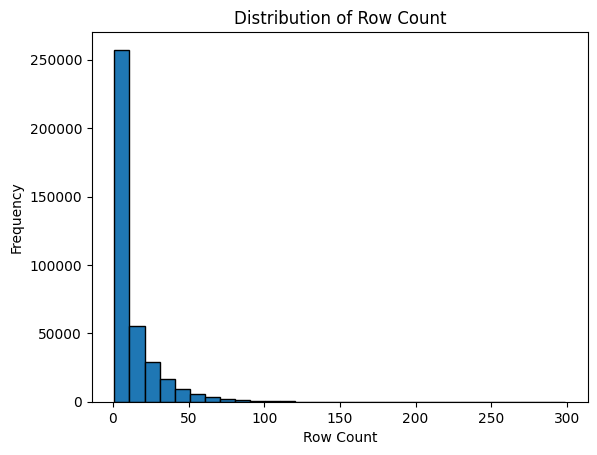

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'shop_parent_counts' is your DataFrame
# If you're using a different name, replace it accordingly

# Plot a histogram
plt.hist(shop_parent_counts['Row_Count'], bins=30, edgecolor='k')
plt.xlabel('Row Count')
plt.ylabel('Frequency')
plt.title('Distribution of Row Count')
plt.show()

In [ ]:
filtered_shops = shop_parent_counts[(shop_parent_counts['Row_Count'] > 2)]

# Get a list of shops to keep
shops_to_keep = filtered_shops['Customer Code Unique'].unique()

# Filter your original DataFrame to keep only the desired shops
sales_data_merged_parent = sales_data_merged_parent[sales_data_merged_parent['Customer Code Unique'].isin(shops_to_keep)]

In [ ]:
unique_shops = sales_data_merged_parent['Customer Code Unique'].unique()
print(unique_shops)
print(unique_shops.size)

[15764 20744  4607 ... 29033 24930 29087]
9980


In [ ]:
specific_sales = sales_data_merged_parent[(sales_data_merged_parent['Customer Code Unique'] == 10112) &
                                (sales_data_merged_parent['Parent Material Code'] == 161015)]
print(specific_sales)

         Customer Code Unique Invoice_Date  Parent Material Code  Sales Liter
1231896                 10112   2022-01-06                161015        140.0
1231919                 10112   2022-01-21                161015        770.0
1231929                 10112   2022-02-01                161015         70.0
1231936                 10112   2022-02-04                161015        140.0
1231950                 10112   2022-02-15                161015         70.0
...                       ...          ...                   ...          ...
1232915                 10112   2023-06-06                161015        210.0
1232934                 10112   2023-06-13                161015         70.0
1232959                 10112   2023-06-16                161015        210.0
1232976                 10112   2023-06-20                161015        210.0
1232982                 10112   2023-06-30                161015        140.0

[77 rows x 4 columns]


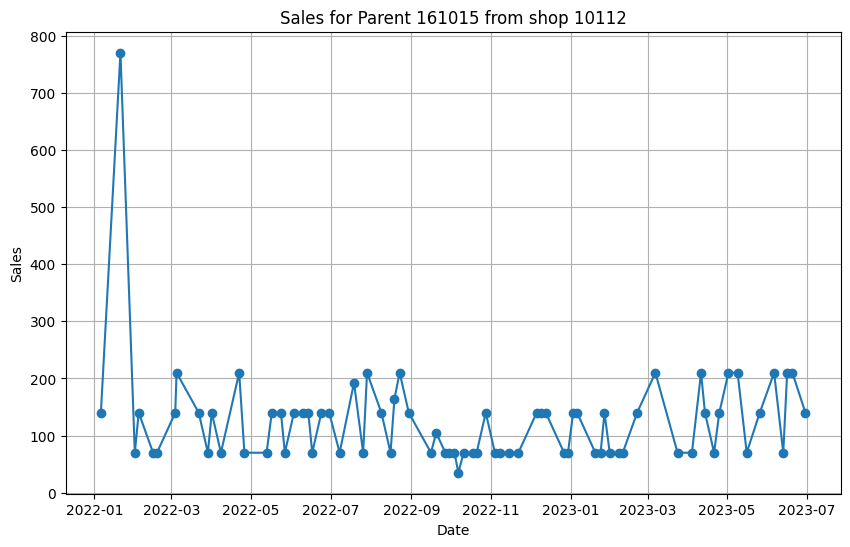

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(specific_sales['Invoice_Date'], specific_sales['Sales Liter'], marker='o')
plt.title(f'Sales for Parent {161015} from shop {10112}')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
from prophet import Prophet

In [ ]:
from pandas.core.tools.datetimes import YearMonthDayDict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

def prophet_prediction_model(dataset, shop_id, parent_id):
  result = {}

  train_num = round(len(dataset)* 0.8)

  train = dataset.iloc[:train_num,:]
  test = dataset.iloc[train_num:, :]

  prophet_model = Prophet()

  prophet_model.fit(train)

  manual_future_dataset = test.copy()
  manual_future_dataset = manual_future_dataset.drop(columns = ['y'])

  forecast = prophet_model.predict(manual_future_dataset)

  r_squared_score = r2_score(list(test['y']), list(forecast['yhat']))
  mape_score = mean_absolute_percentage_error(list(test['y']), list(forecast['yhat']))

  result_dataset = test.copy()
  result_dataset['yhat'] = forecast['yhat'].to_numpy()

  final_dataset = pd.concat([train,result_dataset])

  result_dataset.plot(x='ds', y=['y','yhat'], title=f'shop_id: {shop_id}, parent_id: {parent_id}, R2: {r_squared_score}, MAPE: {mape_score}')

  plt.show()

In [ ]:
selected_columns = specific_sales[['Invoice_Date', 'Sales Liter']]

selected_columns.columns = ['ds', 'y']

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfjj4o1qd/rox1zaux.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfjj4o1qd/subg4dss.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40406', 'data', 'file=/tmp/tmpfjj4o1qd/rox1zaux.json', 'init=/tmp/tmpfjj4o1qd/subg4dss.json', 'output', 'file=/tmp/tmpfjj4o1qd/prophet_model3mn9t7c2/prophet_model-20230910102620.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:26:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:26:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


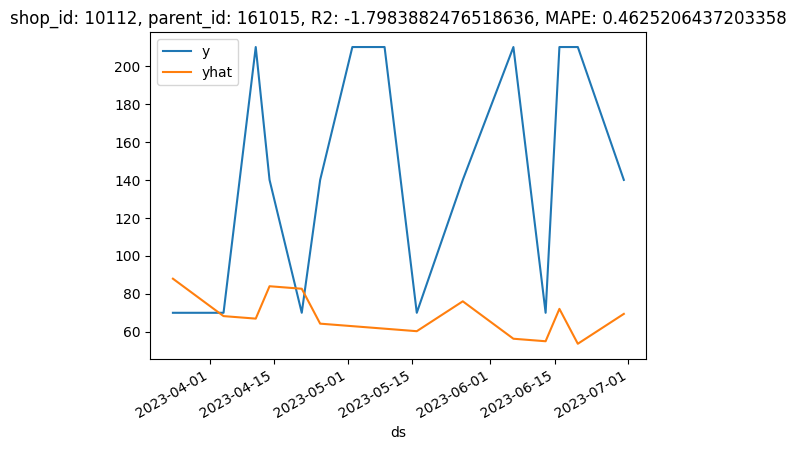

In [ ]:
prophet_prediction_model(selected_columns, 10112, 161015)

In [ ]:
from concurrent.futures import ThreadPoolExecutor

# Assuming 'sales_data_merged_parent' is your DataFrame
# If you're using a different name, replace it accordingly

def apply_prophet_parallel(shop_id, parent_id, df):
    # Call the function for the current subset of data
    prophet_prediction_model(df, shop_id, parent_id)

# Get unique shop IDs and parent product IDs
unique_shops = sales_data_merged_parent['Customer Code Unique'].unique()
unique_parents = sales_data_merged_parent['Parent Material Code'].unique()

# Initialize a ThreadPoolExecutor
executor = ThreadPoolExecutor(max_workers=10)  # Adjust the number of workers based on your system's capacity

# Submit tasks for parallel execution
for shop_id in unique_shops:
    for parent_id in unique_parents:
        subset_data = sales_data_merged_parent[(sales_data_merged_parent['Customer Code Unique'] == shop_id) &
                                               (sales_data_merged_parent['Parent Material Code'] == parent_id)]
        executor.submit(apply_prophet_parallel, shop_id, parent_id, subset_data)

# Shutdown the executor and wait for all tasks to complete
executor.shutdown(wait=True)







KeyboardInterrupt: ignored